## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

import warnings
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

## 1. Đọc dữ liệu

In [2]:
df1 = pd.read_csv('stock_data_output/AGR.csv')
df2 = pd.read_csv('stock_data_output/BID.csv')
df3 = pd.read_csv('stock_data_output/TPB.csv')
df4 = pd.read_csv('stock_data_output/VCB.csv')
df = pd.concat([df1, df2, df3, df4])
df.head()

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2017-01-03,2.31,2.38,2.28,2.30,49690,AGR
1,1,2017-01-04,2.30,2.30,2.21,2.21,57190,AGR
2,2,2017-01-05,2.21,2.26,2.20,2.25,61050,AGR
3,3,2017-01-06,2.25,2.34,2.24,2.24,85850,AGR
4,4,2017-01-09,2.29,2.30,2.26,2.27,107450,AGR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7886 entries, 0 to 2051
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7886 non-null   int64  
 1   time        7886 non-null   object 
 2   open        7886 non-null   float64
 3   high        7886 non-null   float64
 4   low         7886 non-null   float64
 5   close       7886 non-null   float64
 6   volume      7886 non-null   int64  
 7   ticker      7886 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 554.5+ KB


In [4]:
df.describe()

,Unnamed: 0,open,high,low,close,volume
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7.886000e+03
mean,990.180446,21.901782,22.187955,21.623324,21.899947,2.167789e+06
std,577.156861,15.558700,15.698422,15.425070,15.554924,3.421302e+06
min,0.000000,2.060000,2.140000,1.990000,2.010000,0.000000e+00
25%,492.250000,9.970000,10.240000,9.790000,10.045000,6.225400e+05
50%,985.000000,17.455000,17.750000,17.200000,17.475000,1.300578e+06
75%,1478.000000,31.047500,31.500000,30.635000,31.122500,2.416752e+06
max,2051.000000,67.800000,68.600000,66.800000,67.300000,8.097670e+07


## 2. Tiến hành làm sạch

**Xóa các cột không cần thiết**

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,time,open,high,low,close,volume,ticker
0,2017-01-03,2.31,2.38,2.28,2.30,49690,AGR
1,2017-01-04,2.30,2.30,2.21,2.21,57190,AGR
2,2017-01-05,2.21,2.26,2.20,2.25,61050,AGR
3,2017-01-06,2.25,2.34,2.24,2.24,85850,AGR
4,2017-01-09,2.29,2.30,2.26,2.27,107450,AGR


**Kiểm tra trùng lặp dữ liệu**

In [6]:
df.duplicated().sum()

0

**Kiểm tra giá trị Null**

In [7]:
df.isnull().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64

**Chuyển đổi các kiểu dữ liệu cho phù hợp và thêm các cột cần thiệt cho việc trực quan.**

In [8]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [9]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [10]:
df['time'].min(), df['time'].max()

(Timestamp('2017-01-03 00:00:00'), Timestamp('2025-03-21 00:00:00'))

In [11]:
df = df[df['year'] >= 2021]

Dữ liệu ghi lại giá và khối lượng của một vài mã cổ phiếu từ ngày `03/01/2017` đến ngày `29/12/2023` trong 1 thời điểm nhất định cụ thể là trong vòng `1 ngày`.
Các cột dữ liệu bao gồm:

- `Ticker`: mã cổ phiếu (bao gồm: `AGR`, `BID`, `TPB` và `VCB`)
- `Open`: giá mở cửa
- `High`: giá cao nhất
- `Low`: giá thấp nhất
- `Close`: giá đóng cửa
- `Volume`: số lượng giao dịch

`Profit` có thể được tính từ `Close` và `Open` như sau: 

`Profit = (Close - Open) * Volume`

In [12]:
df['profit'] = (df['close'] - df['open']) * df['volume']

In [13]:
df

,time,open,high,low,close,volume,ticker,day,month,year,profit
1002,2021-01-04,8.05,8.29,7.94,8.12,3317500,AGR,4,1,2021,232225.0
1003,2021-01-05,8.12,8.69,8.06,8.69,5703100,AGR,5,1,2021,3250767.0
1004,2021-01-06,9.13,9.28,9.07,9.28,2891500,AGR,6,1,2021,433725.0
1005,2021-01-07,9.56,9.92,9.51,9.92,3640500,AGR,7,1,2021,1310580.0
1006,2021-01-08,10.38,10.61,9.97,10.56,5266000,AGR,8,1,2021,947880.0
...,...,...,...,...,...,...,...,...,...,...,...
2047,2025-03-17,66.00,67.30,66.00,67.30,4946897,VCB,17,3,2025,6430966.1
2048,2025-03-18,67.80,67.80,66.80,66.80,3663486,VCB,18,3,2025,-3663486.0
2049,2025-03-19,67.20,67.20,66.50,66.50,3679899,VCB,19,3,2025,-2575929.3
2050,2025-03-20,66.50,67.00,66.20,66.80,1693378,VCB,20,3,2025,508013.4


In [14]:
Daily_Profit = df.groupby(['time', 'ticker'])['profit'].sum().reset_index()

Daily_Profit = pd.DataFrame(Daily_Profit) #Có thể lấy logarit của profit để dễ nhìn khi vẽ biểu đồ

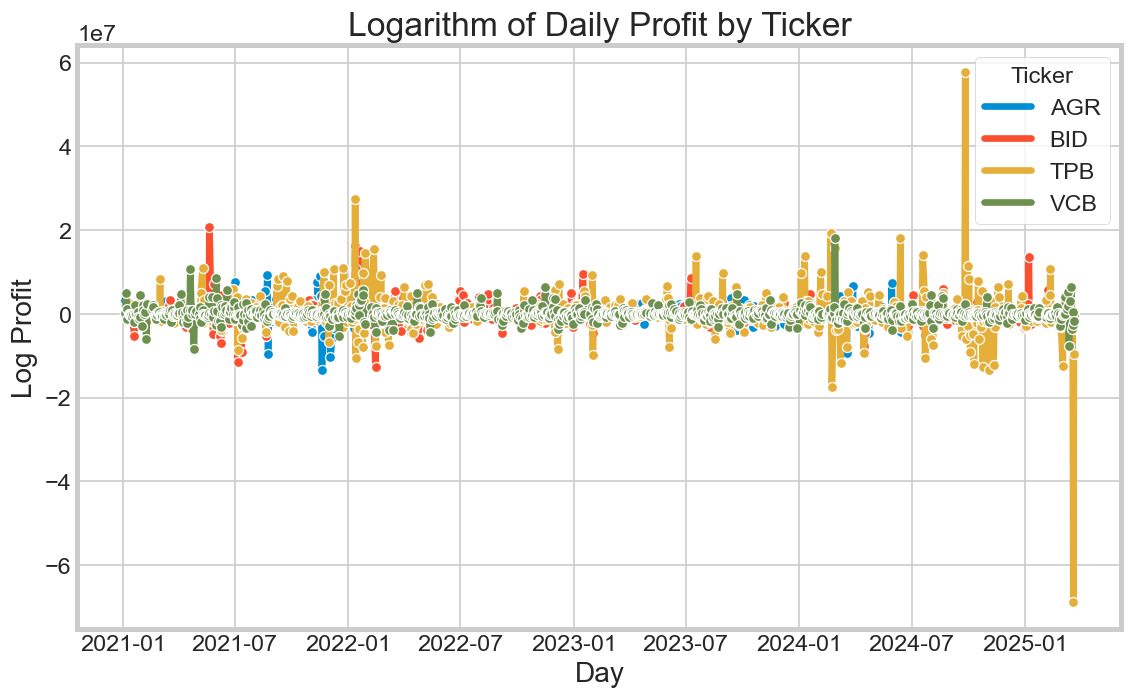

In [15]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=Daily_Profit, x='time', y='profit', hue='ticker', marker='o')

plt.title('Logarithm of Daily Profit by Ticker')
plt.xlabel('Day')
plt.ylabel('Log Profit')
plt.legend(title='Ticker')
plt.show()

**Lưu dữ liệu**

In [16]:
df.to_csv('stock_data_output/data.csv', index=False)

**Tính lợi nhuận trung bình của mỗi cổ phiếu**

In [17]:
mean_profit = df.groupby('ticker')['profit'].mean()
std_profit = df.groupby('ticker')['profit'].std()

print("Mean profit by ticker:")
print(mean_profit)
print("\nStandard deviation of profit by ticker:")
print(std_profit)

Mean profit by ticker:
ticker
AGR     10736.682648
BID     50973.836219
TPB    148088.460010
VCB     45325.013829
Name: profit, dtype: float64

Standard deviation of profit by ticker:
ticker
AGR    1.395596e+06
BID    1.994556e+06
TPB    4.162651e+06
VCB    1.473884e+06
Name: profit, dtype: float64


**Kiểm tra outliers**

In [18]:
outliers = {}
for ticker in df['ticker'].unique():
    ticker_data = df[df['ticker'] == ticker]['profit']
    Q1 = ticker_data.quantile(0.25)
    Q3 = ticker_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[ticker] = ticker_data[(ticker_data < lower_bound) | (ticker_data > upper_bound)]

for ticker, outlier_values in outliers.items():
    print(f"Outliers for {ticker}:")
    print(outlier_values)

Outliers for AGR:
1003    3250767.00
1005    1310580.00
1006     947880.00
1010    2518354.00
1013   -3107063.00
           ...    
1893   -3856116.60
1899    1466589.80
1904    2229163.59
1981    2301530.00
2040     959800.00
Name: profit, Length: 188, dtype: float64
Outliers for BID:
1013    -5267145.0
1021     3976236.0
1049     2129785.0
1050     3286570.0
1053    -2138171.0
           ...    
2003    13582920.0
2006    -2491600.0
2021     5637800.0
2029     1908340.0
2045    -2786910.0
Name: profit, Length: 143, dtype: float64
Outliers for TPB:
699      4341710.0
716      8422561.0
761      4909674.0
762     11019762.0
764      3375064.0
           ...    
1719     2846415.0
1725     2913900.0
1727    -3577880.0
1728   -68830195.0
1729    -9566425.0
Name: profit, Length: 172, dtype: float64
Outliers for VCB:
1004    5013764.0
1013   -2034540.0
1015    2195127.0
1021    4471110.0
1022   -2815640.0
          ...    
2045   -7674743.5
2046    2957559.0
2047    6430966.1
2048   -36634

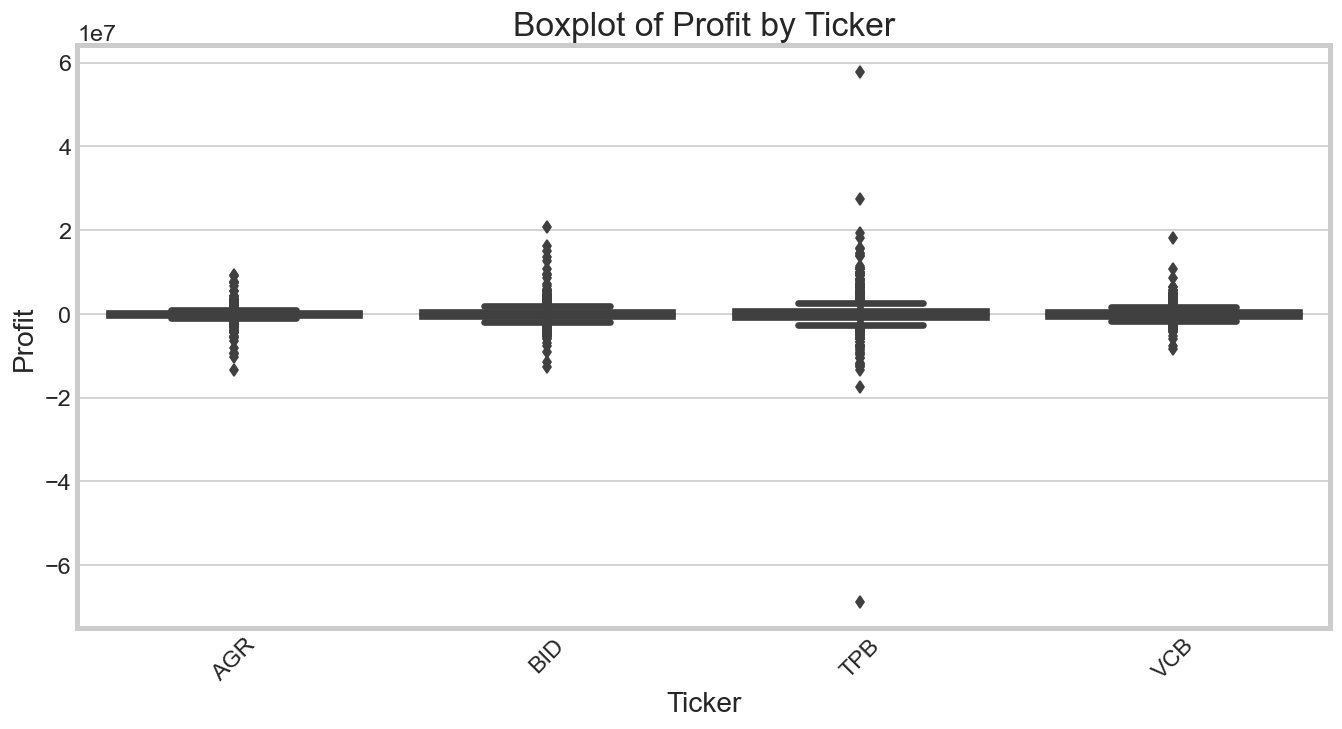

In [19]:
# Vẽ boxplot để xác định outliers cho từng mã cổ phiếu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ticker', y='profit')
plt.title('Boxplot of Profit by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

Mặc dù dữ liệu có số lượng lớn outliers, tuy nhiên về mặt thực tế thì dữ liệu trên hoàn toàn phù hợp. Do đó chúng ta không cần thiết phải xử lí các giá trị ngoại lai này.

**Tìm hiểu quan hệ giữa các biến**

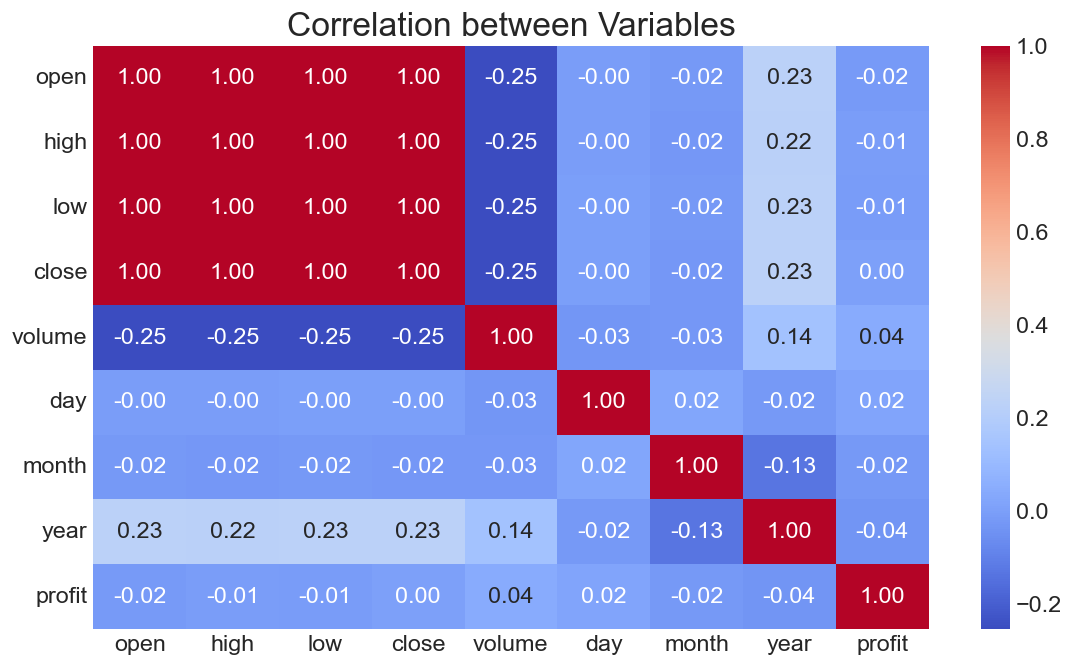

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Variables')
plt.show()

**Kiểm tra phân phối của dữ liệu**

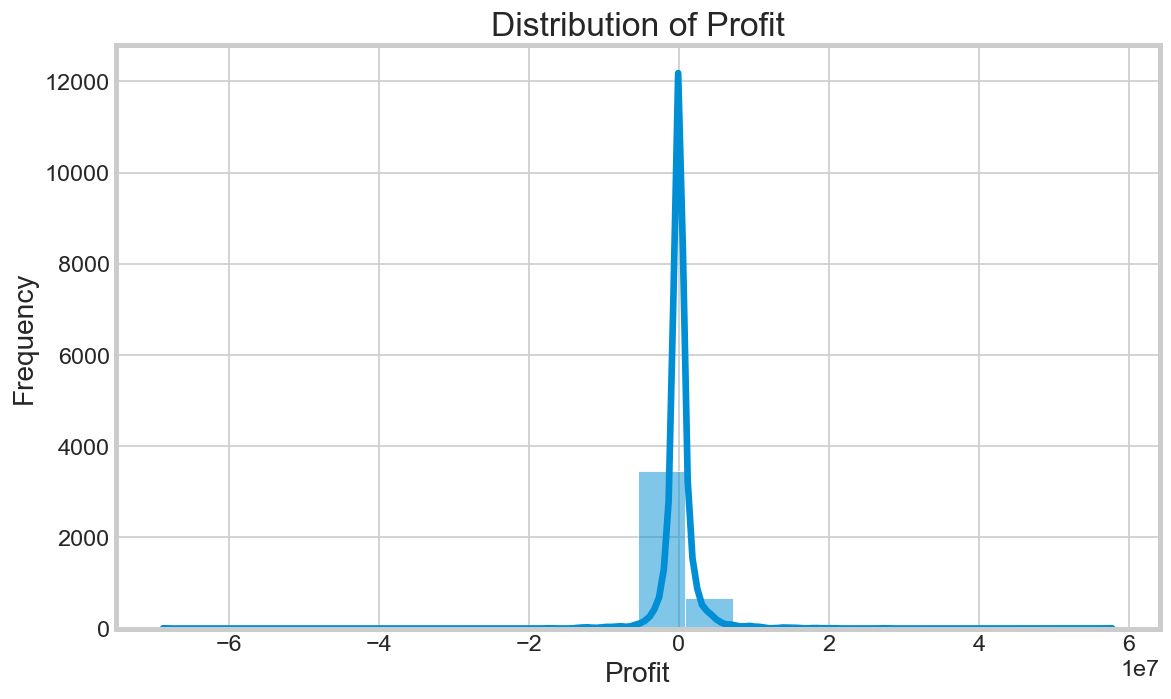

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], kde=True, bins=20)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

**Phân tích nhóm và so sánh**

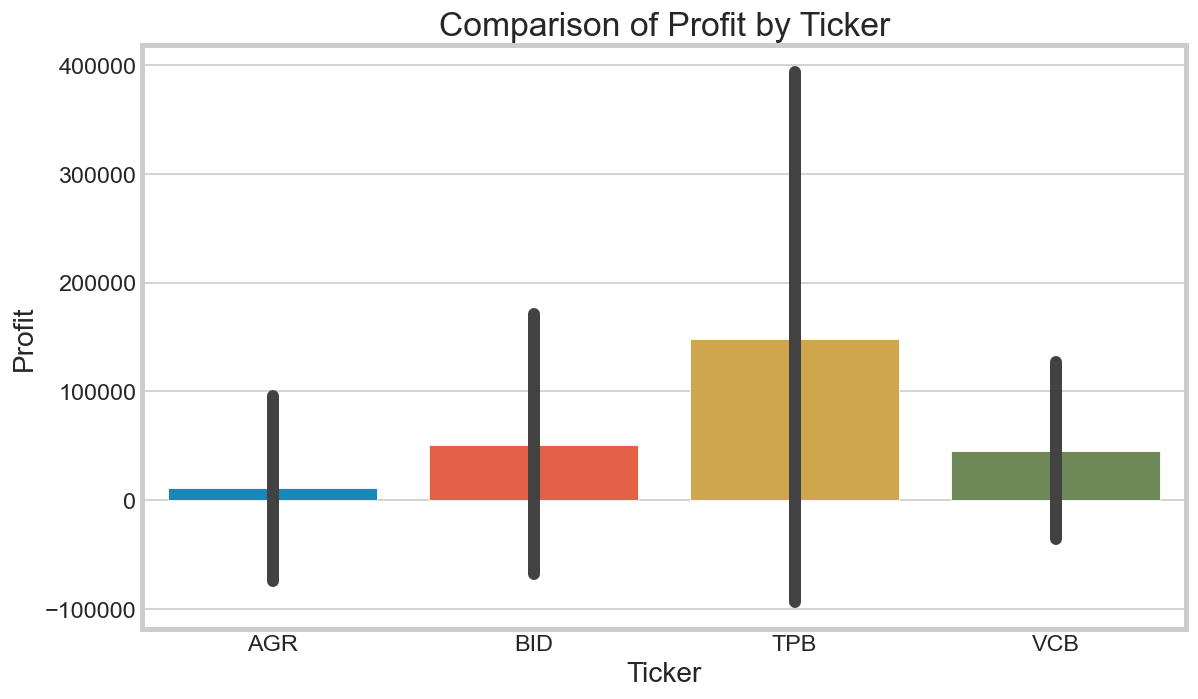

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ticker', y='profit')
plt.title('Comparison of Profit by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Profit')
plt.show()

**Giá cổ phiếu theo thời gian**

In [23]:
df.head()

,time,open,high,low,close,volume,ticker,day,month,year,profit
1002,2021-01-04,8.05,8.29,7.94,8.12,3317500,AGR,4,1,2021,232225.0
1003,2021-01-05,8.12,8.69,8.06,8.69,5703100,AGR,5,1,2021,3250767.0
1004,2021-01-06,9.13,9.28,9.07,9.28,2891500,AGR,6,1,2021,433725.0
1005,2021-01-07,9.56,9.92,9.51,9.92,3640500,AGR,7,1,2021,1310580.0
1006,2021-01-08,10.38,10.61,9.97,10.56,5266000,AGR,8,1,2021,947880.0


In [24]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()

for ticker in df['ticker'].unique():
    ticker_data = df[df['ticker'] == ticker]

    fig.add_trace(go.Candlestick(x=ticker_data['time'],
                    open=ticker_data['open'],
                    high=ticker_data['high'],
                    low=ticker_data['low'],
                    close=ticker_data['close'],
                    visible=False,
                    name=ticker))

fig.data[0].visible = True

buttons = []
for i, ticker in enumerate(df['ticker'].unique()):
    button = dict(label=ticker,
                  method='update',
                  args=[{'visible': [trace == i for trace in range(len(fig.data))]}])
    buttons.append(button)

fig.update_layout(title='Candlestick chart of Stocks',
                  xaxis_title='Date',
                  yaxis_title='Profit',
                  xaxis_rangeslider_visible=False,
                  updatemenus=[dict(type='buttons', showactive=True, buttons=buttons)])

fig.show()

**Lợi nhuận trung bình hằng ngày của mỗi cổ phiếu**

Sử dụng đường trung bình động (SMA) 

In [25]:
for p_avg in [10, 20, 50]:
    df[f'profit_avg_{p_avg}'] = df['close'].rolling(window=p_avg).mean()

In [26]:
df.fillna(0, inplace=True)

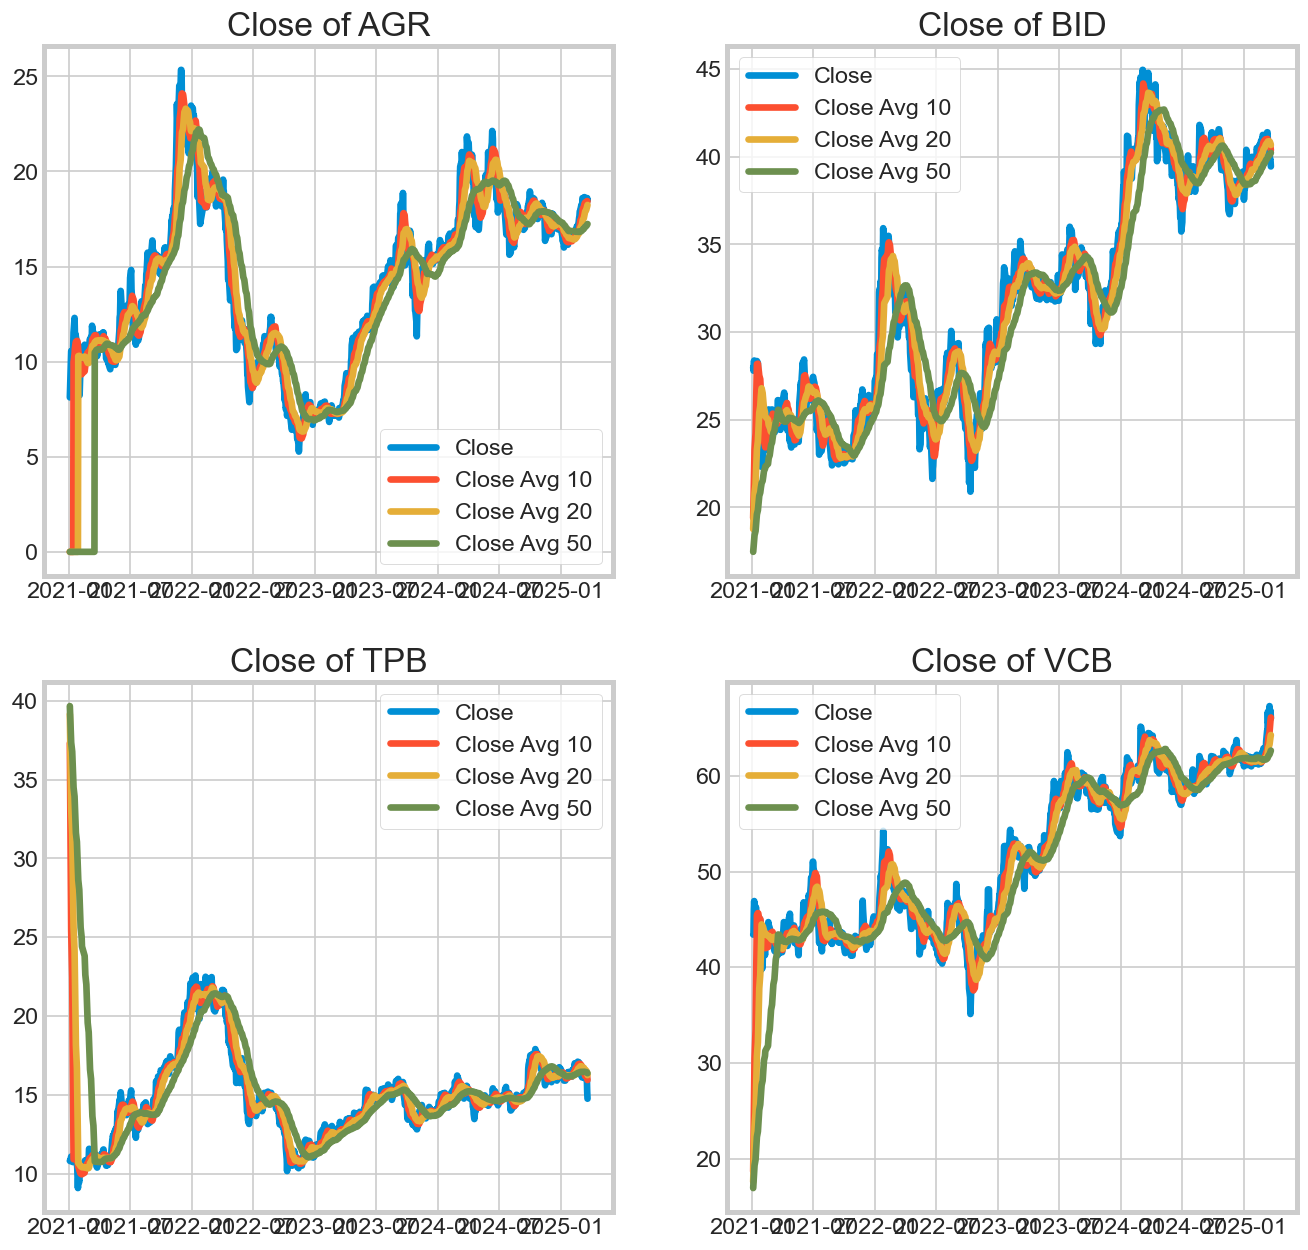

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, ticker in enumerate(df['ticker'].unique()):
    ax = axes[i // 2, i % 2]
    ticker_data = df[df['ticker'] == ticker]
    ax.plot(ticker_data['time'], ticker_data['close'], label='Close')
    for p_avg in [10, 20, 50]:
        ax.plot(ticker_data['time'], ticker_data[f'profit_avg_{p_avg}'], label=f'Close Avg {p_avg}')
    ax.set_title(f'Close of {ticker}')
    ax.legend()

### **Tạo data train**

In [28]:
df1 = pd.read_csv('stock_data_output/AGR.csv')
df2 = pd.read_csv('stock_data_output/BID.csv')
df3 = pd.read_csv('stock_data_output/VCB.csv')
df4 = pd.read_csv('stock_data_output/TPB.csv')

df1 = df1[['time', 'close']].rename(columns={'time': 'Date', 'close': 'AGR'})
df2 = df2[['time', 'close']].rename(columns={'time': 'Date', 'close': 'BID'})
df3 = df3[['time', 'close']].rename(columns={'time': 'Date', 'close': 'VCB'})
df4 = df4[['time', 'close']].rename(columns={'time': 'Date', 'close': 'TPB'})

df = pd.merge(df1, df2, on='Date')
df = pd.merge(df, df3, on='Date')
df = pd.merge(df, df4, on='Date')

df.to_csv('stock_data_output/VN.csv', index=False)
df.head()

,Date,AGR,BID,VCB,TPB
0,2018-04-19,4.30,20.97,25.96,8.06
1,2018-04-20,4.44,21.77,27.24,8.07
2,2018-04-23,4.30,20.25,25.37,7.65
3,2018-04-24,4.24,20.97,25.54,7.65
4,2018-04-26,3.94,20.14,24.77,7.38
